This notebook evaluates the Global Terrorism Database and provides a visualization of the number of attacks per region over time

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("globalterrorismdb_0718dist.csv")

C:\Users\laure\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [8]:
for col in df.columns :
    print (col)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

In [6]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Investigating certain columns to see if data would be worth including. Final conclusion - the country_txt, region_txt, iyear, imonth, iday, nkill, nwound, attacktype_txt, and gname are the most interesting for the purposes of this project.

In [16]:
df["motive"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
181686    NaN
181687    NaN
181688    NaN
181689    NaN
181690    NaN
Name: motive, Length: 181691, dtype: object

Tableau's visualization of the region type isn't exactly what I want, and I don't have room in the dashboard for this viz, so Python is probably best to give me more customization options. Plus, I'd like to be able to pick better colors. I will use matplotlib and seaborn.

In [59]:
import matplotlib.pyplot as plt
import matplotlib

In [60]:
matplotlib.use('nbagg')

In [61]:
%matplotlib inline

In [67]:
regions = df.groupby(["iyear","region_txt"]).count()['eventid']

In [73]:
import seaborn as sns

In [83]:
colors = sns.color_palette('Paired', 12)

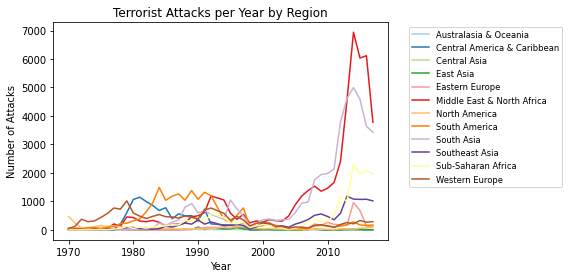

In [95]:
fig, ax = plt.subplots()
df.groupby(['iyear', 'region_txt']).count()['eventid'].unstack().plot(ax=ax, color=colors)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize='small')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Attacks")
ax.set_title("Terrorist Attacks per Year by Region")
plt.show()